# Detecció de contorns


In [ ]:
MIREIA: Explicar que podem detectar contorns aplicant diferents matrius de convolució: Sobel, Laplacian, etc:
            
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
                
MIREIA: Explicar canny com a mètode més refinat per a detectar contorns
    


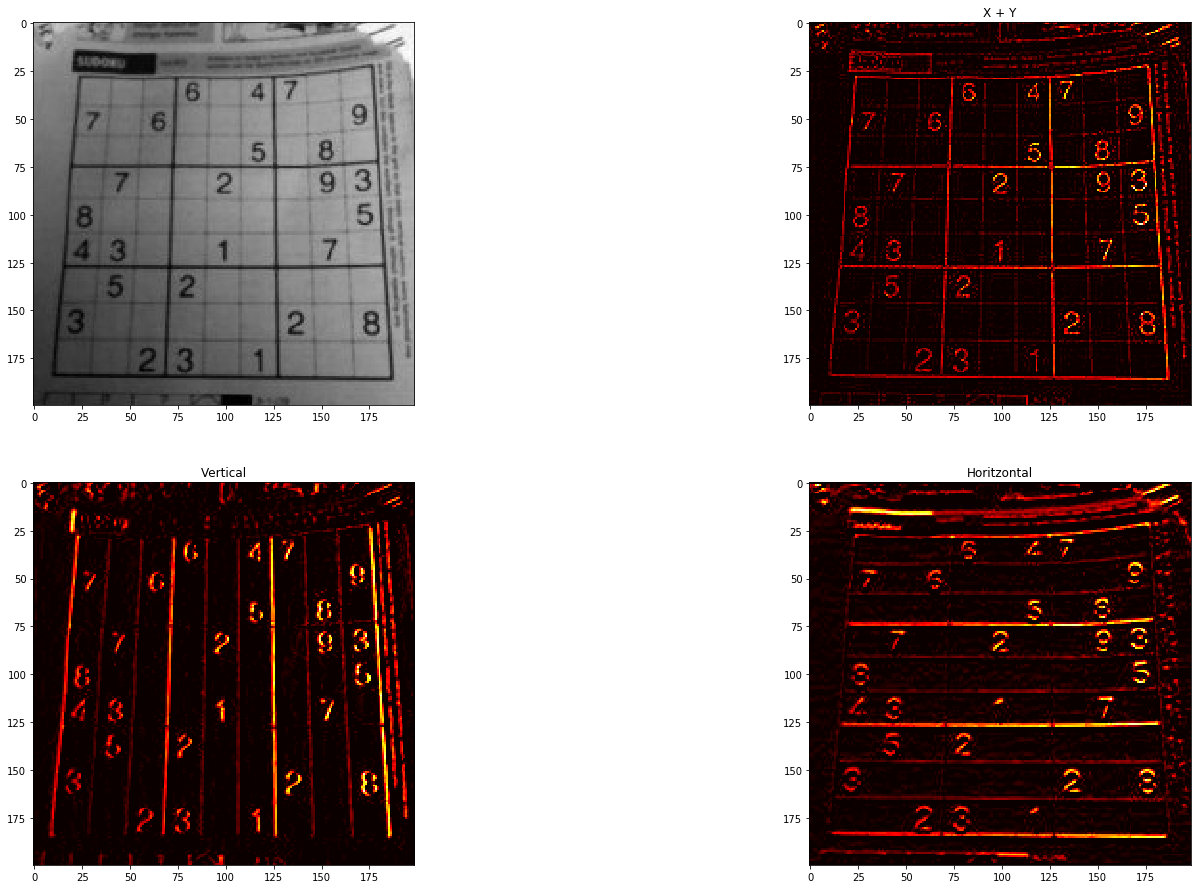

In [57]:
# EXERCICI: Detecció de contorns amb diferents matrius de convolució

import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('Imatges/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# creem un kernel per detectar contorns en direcció horitzontal i vertical
kernel = np.array([ [0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
dst = cv2.filter2D(im,-1,kernel)

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.title('X + Y')
plt.imshow(dst, cmap='hot')


# creem un kernel per detectar contorns en direcció vertical
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel)
plt.subplot(2,2,3)
plt.title('Vertical')
plt.imshow(dst, cmap='hot')

# creem un kernel per detectar contorns en direcció horitzontal
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel.transpose())
plt.subplot(2,2,4)
plt.title('Horitzontal')
plt.imshow(dst, cmap='hot')


fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)



De vegades, és molt difícil obtenir el valor adequat d'un paràmetre d'un algoritme. Per això, les OpenCV disposen de barres de selecció interactives que es poden afegir a finestres amb imatges. D'aquesta manera, podem crear interfaces interactives per a escollir els millors paràmetres possibles. 

Anem a veure això per a escollir els millors valors per processar una imatge

In [44]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread('Imatges/coins.jpg', cv2.IMREAD_GRAYSCALE)

# per detectar les monedes, podem fer servir un detector de contorns com Canny:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

# callback cridat cada cop que es modifiqui un paràmetre
def callback(x):
    # no fem res
    pass

# creem una finestra apart
cv2.namedWindow('canny')

# i afegim un
cv2.createTrackbar('lower', 'canny', 100, 255, callback)
cv2.createTrackbar('upper', 'canny', 100, 255, callback)

# Bucle infinit per a poder interactuar amb les finestres (mentre no ses premi ESC)
while(True):

    # obtenim el valord dels paràmetres
    lower = cv2.getTrackbarPos('lower', 'canny')
    upper = cv2.getTrackbarPos('upper', 'canny')
    sobel = cv2.getTrackbarPos('sobel_size', 'canny')
    # apliquem els paràmetres a l'algoritme de contorns
    edges = cv2.Canny(im, lower, upper)
    # display images
    cv2.imshow('original', im)
    cv2.imshow('canny', edges)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:   # hit escape to quit
        break

cv2.destroyAllWindows()
